In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append('../')
import dataset_wrapper as util

In [3]:
import ee
ee.Authenticate() 
ee.Initialize()

In [4]:
import geopandas as gpd
dataframe = gpd.read_file('/data2/hkaman/Data/CDL/California_Counties.geojson')
dataframe = dataframe.to_crs(epsg=4326)
dataframe

,OBJECTID,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,Shape__Area,Shape__Length,geometry
0,1,Alameda County,California,06,001,06001,3.084661e+09,4.484258e+05,"MULTIPOLYGON (((-122.19112 37.69298, -122.1910..."
1,2,Alpine County,California,06,003,06003,3.156006e+09,2.755651e+05,"POLYGON ((-119.90061 38.93077, -119.88726 38.9..."
2,3,Amador County,California,06,005,06005,2.562531e+09,3.595932e+05,"POLYGON ((-120.07765 38.70889, -120.07771 38.7..."
3,4,Butte County,California,06,007,06007,7.340033e+09,5.259746e+05,"POLYGON ((-121.40463 40.14665, -121.40489 40.1..."
4,5,Calaveras County,California,06,009,06009,4.356209e+09,3.670057e+05,"POLYGON ((-120.07247 38.50916, -120.07254 38.4..."
5,6,Colusa County,California,06,011,06011,4.990775e+09,3.860411e+05,"POLYGON ((-122.10655 39.41443, -122.10278 39.4..."
6,7,Contra Costa County,California,06,013,06013,3.075717e+09,4.515488e+05,"MULTIPOLYGON (((-122.37203 37.90142, -122.3717..."
7,8,Del Norte County,California,06,015,06015,4.715185e+09,4.214900e+05,"MULTIPOLYGON (((-124.11103 41.59347, -124.1112..."
8,9,El Dorado County,California,06,017,06017,7.624185e+09,4.677944e+05,"POLYGON ((-119.90433 38.93333, -119.90442 38.9..."
9,10,Fresno County,California,06,019,06019,2.430318e+10,1.104287e+06,"POLYGON ((-119.00148 37.57090, -119.00097 37.5..."


In [5]:
county_names = dataframe['NAME'].str[:-7].tolist()
county_names = county_names[27:]
county_names

['Napa',
 'Nevada',
 'Orange',
 'Placer',
 'Plumas',
 'Riverside',
 'Sacramento',
 'San Benito',
 'San Bernardino',
 'San Diego',
 'San Francisco',
 'San Joaquin',
 'San Luis Obispo',
 'San Mateo',
 'Santa Barbara',
 'Santa Clara',
 'Santa Cruz',
 'Shasta',
 'Sierra',
 'Siskiyou',
 'Solano',
 'Sonoma',
 'Stanislaus',
 'Sutter',
 'Tehama',
 'Trinity',
 'Tulare',
 'Tuolumne',
 'Ventura',
 'Yolo',
 'Yuba']

### ET

In [4]:
# for name in county_names: 
#     if name != 'Monterey':
for year in range(2008, 2023):
    if year != 2012:
        util.DownloadOpenETEE(year = year, county_name= 'Yolo')()

2008-01-01 2008-01-31
Export task Yolo_OpenET_2008_01 started.
2008-02-01 2008-02-29
Export task Yolo_OpenET_2008_02 started.
2008-03-01 2008-03-31
Export task Yolo_OpenET_2008_03 started.
2008-04-01 2008-04-30
Export task Yolo_OpenET_2008_04 started.
2008-05-01 2008-05-31
Export task Yolo_OpenET_2008_05 started.
2008-06-01 2008-06-30
Export task Yolo_OpenET_2008_06 started.
2008-07-01 2008-07-31
Export task Yolo_OpenET_2008_07 started.
2008-08-01 2008-08-31
Export task Yolo_OpenET_2008_08 started.
2008-09-01 2008-09-30
Export task Yolo_OpenET_2008_09 started.
2008-10-01 2008-10-31
Export task Yolo_OpenET_2008_10 started.
2008-11-01 2008-11-30
Export task Yolo_OpenET_2008_11 started.
2008-12-01 2008-12-31
Export task Yolo_OpenET_2008_12 started.
2009-01-01 2009-01-31
Export task Yolo_OpenET_2009_01 started.
2009-02-01 2009-02-28
Export task Yolo_OpenET_2009_02 started.
2009-03-01 2009-03-31
Export task Yolo_OpenET_2009_03 started.
2009-04-01 2009-04-30
Export task Yolo_OpenET_2009_04 s

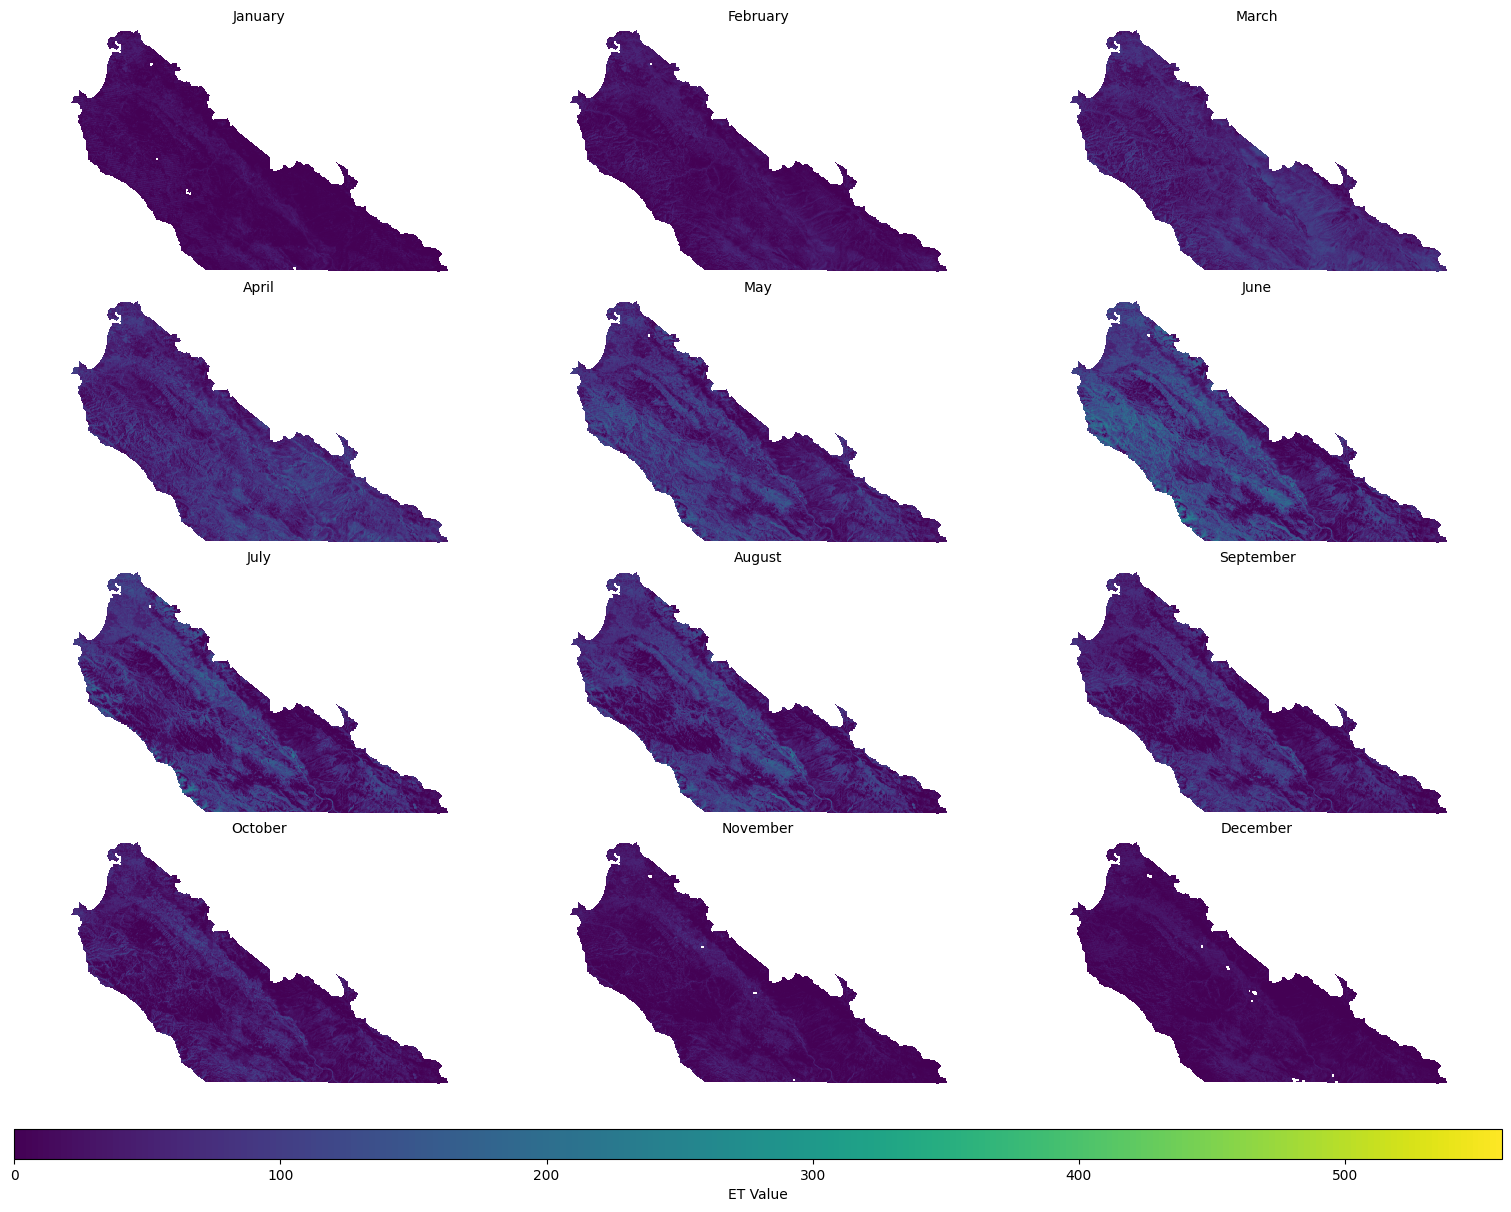

In [7]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Function to plot 12 TIFF files
def plot_tiff_files(folder_path):
    # Get a list of all TIFF files in the folder
    tiff_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.tiff') or f.endswith('.tif')]

    # Sort files for consistent order
    tiff_files.sort()

    # Month names for titles
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

    # Read all TIFF files and store data in a list
    data_list = []
    for tiff_file in tiff_files:
        with rasterio.open(tiff_file) as src:
            data = src.read(1)  # Read the first band
            data_list.append(data)

    # Determine the global min and max values across all files
    global_min = min([np.nanmin(data) for data in data_list])
    global_max = max([np.nanmax(data) for data in data_list])

    # Set up the plot grid
    fig, axes = plt.subplots(4, 3, figsize=(15, 12), constrained_layout=True)
    axes = axes.flatten()

    # Plot each TIFF file
    for i, (data, ax) in enumerate(zip(data_list, axes)):
        im = ax.imshow(data, cmap='viridis', vmin=global_min, vmax=global_max)
        ax.set_title(months[i], fontsize=10)
        ax.axis('off')

    # Remove any unused subplots
    for ax in axes[len(data_list):]:
        ax.axis('off')

    # Add a single colorbar for the entire figure
    cbar = fig.colorbar(im, ax=axes, orientation='horizontal', fraction=0.05, pad=0.04, aspect=50)
    cbar.set_label('ET Value')

    plt.show()

# Example usage
folder_path = "/data2/hkaman/Data/FoundationModel/Monterey/ET/2008"  # Replace with your folder path
plot_tiff_files(folder_path)
